In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

## Training Set Analysis

In [3]:
train = pd.read_csv('Train.csv')

train.head()

,SEQUENCE_ID,SEQUENCE,CREATURE,LABEL
0,00011UBJ,MPWQELSITVPHEYVEPISYLFGRYGKGVSTELAGNGQVLLRTYLT...,creature9,class11
1,0001HZ3P,MGKLVIGSRGSELALWQANHIKERLKKECLIESEIQIVKTKGDKIL...,creature3,class13
2,0003NJDO,MFIVAVLMLAFLIFVHELGHFTIARICGVKVEVFSIGFGKKLCFFK...,creature3,class16
3,0003XVE3,MKNTSLSTTLTMNDTIAAIATPLGKGAISIIKISGHNALNILKQLT...,creature3,class12
4,00049BS0,MGNRLTKIYTKTGDSGLTGLADGSRTEKDSLRIFVIGDVDELNSLL...,creature8,class13


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858777 entries, 0 to 858776
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   SEQUENCE_ID  858777 non-null  object
 1   SEQUENCE     858777 non-null  object
 2   CREATURE     858777 non-null  object
 3   LABEL        858777 non-null  object
dtypes: object(4)
memory usage: 26.2+ MB


In [5]:
train['CREATURE'].value_counts()

creature8    140738
creature3    138450
creature4    133900
creature9    111984
creature0     90240
creature1     84968
creature2     80405
creature5     78092
Name: CREATURE, dtype: int64

In [6]:
train['LABEL'].value_counts()

class19    256273
class11     62087
class2      52784
class6      46636
class8      45052
class12     37866
class5      36916
class9      36666
class1      35987
class10     35438
class3      32719
class4      32301
class13     29631
class16     28414
class7      19286
class14     17792
class17     14923
class15     13967
class18     12930
class0      11109
Name: LABEL, dtype: int64

In [7]:
train['target'] = train['LABEL'].str.replace('[A-Za-z]', '').astype(int)

train['creature'] = train['CREATURE'].str.replace('[A-Za-z]', '').astype(int)

<AxesSubplot:xlabel='creature', ylabel='Count'>

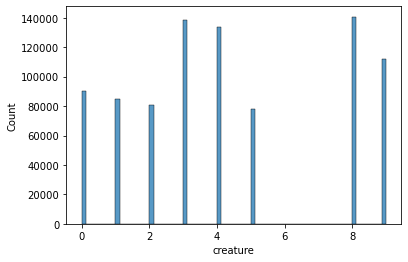

In [13]:
sns.histplot(train['creature'])

<AxesSubplot:xlabel='target', ylabel='Count'>

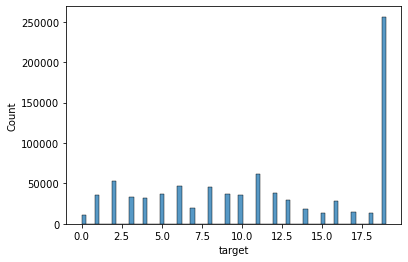

In [12]:
sns.histplot(train['target'])

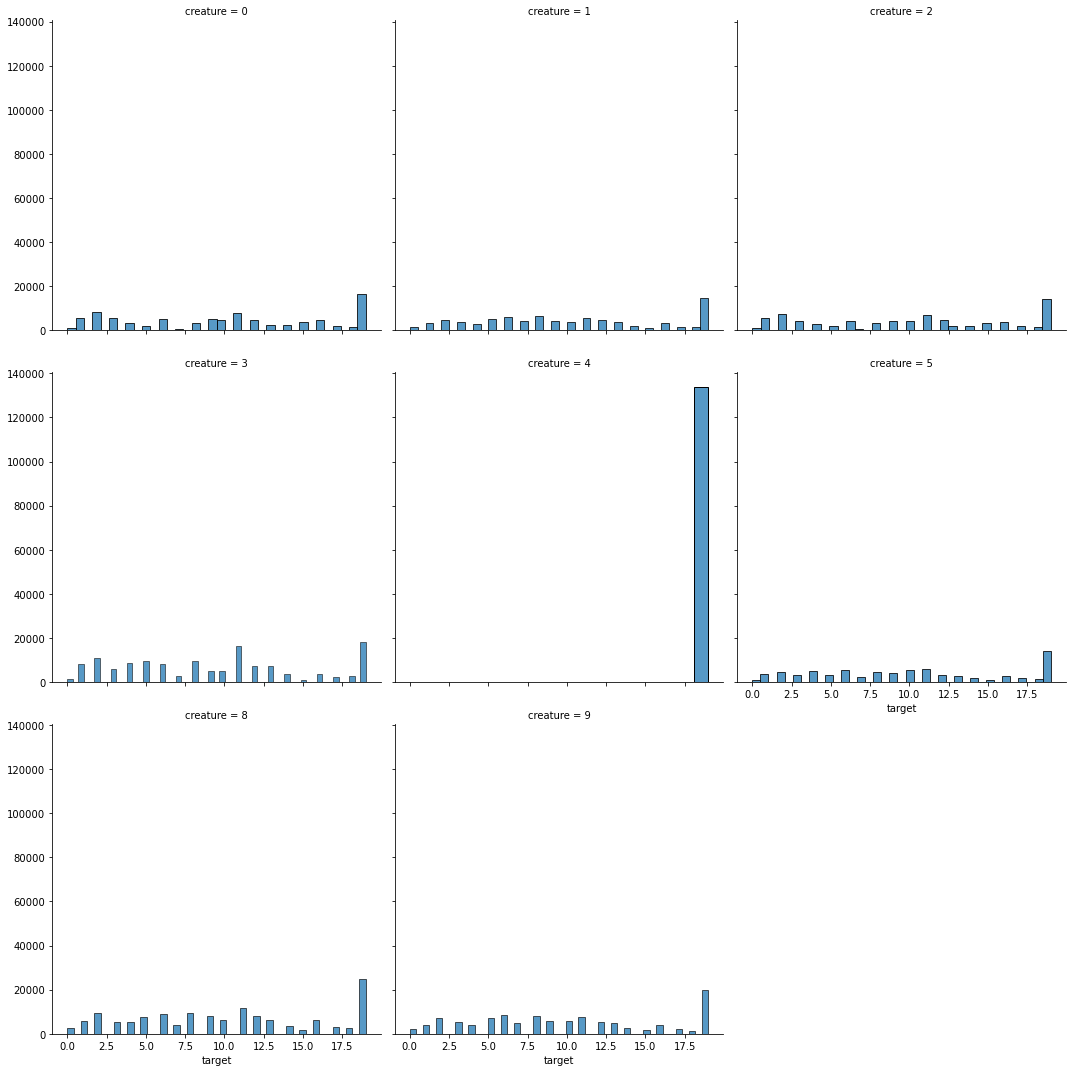

In [8]:

data = train[['CREATURE', 'LABEL', 'target', 'creature']]

g = sns.FacetGrid(data, col="creature", height=5, col_wrap=3)
g.map(sns.histplot, "target")


In [9]:
seq = train[train['SEQUENCE'] == "FFRENLAFPEGEAREFPSEQTRAIGPTRGEPQVWGRSSNSLSEAGGDRQGHGQGTVSLSFPQITLWQRPLVTIKIGGQLKEALLDTGADDTVVEEMDLPGRWKPKMIGGIGGFIKVRQYDQILVEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNFPISPIETVPVKLKPGMDGPRVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDMVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLKWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPITLPEKDDWTVNDIQKLVGKLNWASQIYAGIKVKQLCRLLRGAKALTEVIPLTKEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQCQWTWQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKIATESIVIWGKIPKFRLPIQKETWETWWTEYWQATWIPDWEFISTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKLGRAGYVTDRGKQKVVSLTDTTNQKTELQAIHLALQDSGSEVNIVTDSQYALGIIQACPDKSESELVSQIIEELIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVLFLDGIDKAQEEHEKYHSNWRAMASDFNLPPIVAKEIVASCDKCQLKGEAIHGQVDCSPGIWQLDCTHLEGKIILVAVHVASGYIEAEVIPAETGQETAYFILKLAGRWPVKTIHTDNGSNFTSAAVKAACWWAGIKQEFGIPYNPQSQGVVESMNKELKKIIGQVREQAEHLKTAVQMAVFVHNFKRKGGIGGYSAGERIIDIIATDIQTKELQKQITKIQNFRVYYRDSRDPLWKGPAKLLWKGEGAVVIQDNSDIKVVPRRKAKIIRDYGKQMAGDDCVASRQDED"]

seq['LABEL'].value_counts()

class19    201
Name: LABEL, dtype: int64

In [10]:
seq_dups = len(train['SEQUENCE']) - len(train['SEQUENCE'].unique())
print(seq_dups)

42077


In [11]:
train['seq_char_count']= train['SEQUENCE'].apply(lambda x: len(x))

def plot_seq_count(df, data_name):
  sns.distplot(df['seq_char_count'].values)
  plt.title(f'Sequence char count: {data_name}')
  plt.grid(True)

In [15]:
def get_code_freq(df, data_name):
  
  df = df.apply(lambda x: " ".join(x))
  
  codes = []
  for i in df: # concatination of all codes
    codes.extend(i)

  codes_dict= Counter(codes)
  codes_dict.pop(' ') # removing white space
  
  print(f'Codes: {data_name}')
  print(f'Total unique codes: {len(codes_dict.keys())}')

  df = pd.DataFrame({'Code': list(codes_dict.keys()), 'Freq': list(codes_dict.values())})
  return df.sort_values('Freq', ascending=False).reset_index()[['Code', 'Freq']]
  
# train code sequence
train_code_freq = get_code_freq(train['SEQUENCE'], 'Train')

def plot_code_freq(df, data_name):
  
  plt.title(f'Code frequency: {data_name}')
  sns.barplot(x='Code', y='Freq', data=df)


Codes: Train
Total unique codes: 24


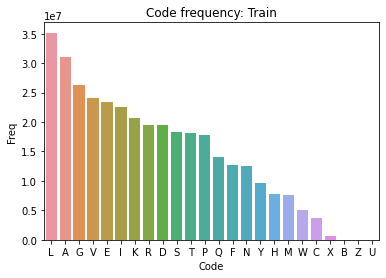

In [19]:
plot_code_freq(train_code_freq, 'Train')

## Test Set Analysis


In [15]:
test = pd.read_csv('Test.csv')
test.head()

,SEQUENCE_ID,SEQUENCE,CREATURE
0,000LRRAI,MKLPVKRYAVAAIVALGVSMAPGELRTSPEAQIKIATREECRATPY...,creature7
1,000O8L4W,MKISVFGSGYVGLVQAAVLAEVGHDVVCMDIDKVKVEQLSQGQVHI...,creature6
2,000UKB5J,MTMKVGFIGLGIMGKPMSKNLLKAGYSLVVADRNPEAIADVIAAGA...,creature7
3,00111SLH,MTVSLSRLERQLGYTFKDQELMILALTHRSFAGRNNERLEFLGDAI...,creature6
4,001ELB0A,MSKIRVLSVDDSALMRQIMTEIINSHSDMEMVATAPDPLVARDLIK...,creature7


In [10]:
test_seq_dups = len(test['SEQUENCE']) - len(test['SEQUENCE'].unique())
print(test_seq_dups)

68


In [17]:

test['creature'] = test['CREATURE'].str.replace('[A-Za-z]', '').astype(int)

<AxesSubplot:xlabel='creature', ylabel='Count'>

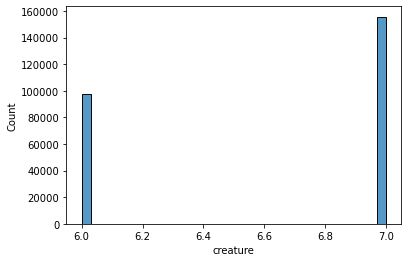

In [18]:
sns.histplot(test['creature'])

In [11]:
train[train['SEQUENCE'].isin(test['SEQUENCE'])]

,SEQUENCE_ID,SEQUENCE,CREATURE,LABEL,target,creature
653,00XNKCB7,MHSKPSRRPFSLALRLTFFISLSTILAFIAFTWFMLHSVEKHFAEQ...,creature2,class19,19,2
1015,01JL31UA,MNEYQFVLPYPPSVNTYWRRRGSQYYISDKGQKYRKDVQKIIRQLK...,creature0,class2,2,0
1507,029PSSF6,MYRIYTRTGDKGTTALYGGSRIEKDHIRVEAYGTVDELISQLGVCY...,creature2,class13,13,2
4223,06FUP8DM,MRKHTPIIKWAGGKTKLMPFLSKHFPHDKSRRWVEPFIGGGAVFLN...,creature0,class11,11,0
4274,06IK4J1I,MREAVIAEVSTQLSEVVGVIERHLEPTLLAVHLYGSAVDGGLKPHS...,creature2,class19,19,2
...,...,...,...,...,...,...
852661,ZQSDFJ0J,MAEKRNIFLVGPMGAGKSTIGRQLAQQLNMEFYDSDQEIEKRTGAD...,creature0,class19,19,0
852677,ZQSYZ74P,MREAVIAEVSTQLSEVVGVIERHLEPTLLAVHLYGSAVDGGLKPHS...,creature2,class19,19,2
855214,ZUNKA0OP,MVSKSAELLFQNHIIEQLSSSGWLFGSSSGYDRERAIYPEDALAYV...,creature2,class2,2,2
857745,ZYGO4QFK,MKLILPFPPSVNTYWRHPNKGAFAGKSLISTAGRKFQSAACAAIVE...,creature2,class2,2,2


<AxesSubplot:xlabel='creature', ylabel='Count'>

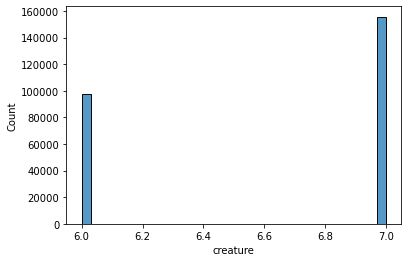

In [24]:
sns.histplot(test['creature'])

## Sequence Analysis

In [20]:
import glob
path = "unlabelled_data/unlabelled_sequences/*.csv"
df_list = []
for fname in glob.glob(path):
    print(f"Reading in {fname}")
    df = pd.read_csv(fname)
    df_list.append(df)
    
sequence_df = pd.concat(df_list)

Reading in unlabelled_data/unlabelled_sequences/14.csv
Reading in unlabelled_data/unlabelled_sequences/21.csv
Reading in unlabelled_data/unlabelled_sequences/23.csv
Reading in unlabelled_data/unlabelled_sequences/6.csv
Reading in unlabelled_data/unlabelled_sequences/17.csv
Reading in unlabelled_data/unlabelled_sequences/8.csv
Reading in unlabelled_data/unlabelled_sequences/20.csv
Reading in unlabelled_data/unlabelled_sequences/12.csv
Reading in unlabelled_data/unlabelled_sequences/15.csv
Reading in unlabelled_data/unlabelled_sequences/13.csv
Reading in unlabelled_data/unlabelled_sequences/3.csv
Reading in unlabelled_data/unlabelled_sequences/4.csv
Reading in unlabelled_data/unlabelled_sequences/16.csv
Reading in unlabelled_data/unlabelled_sequences/0.csv
Reading in unlabelled_data/unlabelled_sequences/5.csv
Reading in unlabelled_data/unlabelled_sequences/7.csv
Reading in unlabelled_data/unlabelled_sequences/19.csv
Reading in unlabelled_data/unlabelled_sequences/9.csv
Reading in unlabel

In [23]:
unlabelled_sequences = sequence_df.reset_index()['sequence']

print(unlabelled_sequences)

0          MIDFGKFYQQIACGPLAHWLETLPAQVAAWQRDTLHGQFKQWKNSL...
1          MLNNDAKVIIYMKKILSILLLLVLSIPSLVVTTSHAEEKIHIEAAA...
2          METASSRTLLFDKALMDTAILSVAQSIVSEYSPKDIPRLAFIGIQL...
3          MKFQGLVKVIQKKFVSDDVFKIVIEKPEHMGEVRPGQFFNFNVERM...
4          MRTSKLSIRLLWYITPLVILPLLFLGGFTLTNVTSSTQKQAELIVS...
                                 ...                        
2862352    MSAPRHPVAPGKLYGVGLGPGDPDLLTLAAVKAIAEADVVAYHSAR...
2862353    MKRYISLKIKMALTVFVLILGTLSVFGLLALHHLEKGHREGIARQQ...
2862354    MSPSAASPPQDGLFARLGKIFRTTAFKLSLAYLVLFAVLASLGLGY...
2862355    MELTLLGTGAPLGLPRPDCPCAVCALSRGPAARASTSLLVDGALLL...
2862356    MPLRTFDGIAVETPHARIPGSKSLTNRALLLAAAAEGTTVLSAPLV...
Name: sequence, Length: 2862357, dtype: object


In [33]:
print(f"There are {unlabelled_sequences[unlabelled_sequences.isin(train['SEQUENCE'])].shape[0]} sequences in train")

print(f"There are {unlabelled_sequences[unlabelled_sequences.isin(test['SEQUENCE'])].shape[0]} sequences in test")


There are 35665 sequences in train
There are 33457 sequences in test


In [39]:
print(f"The number of unique (raw) {train['SEQUENCE'].nunique()} in train")

print(f"The number of unique (truncated)  {train['SEQUENCE'].apply(lambda x: str(x)[:100]).nunique()} in train")

The number of unique (raw) 816700 in train
The number of unique (truncated)  575647 in train


In [40]:
print(f"The number of unique (raw) {test['SEQUENCE'].nunique()} in test")

print(f"The number of unique (truncated)  {test['SEQUENCE'].apply(lambda x: str(x)[:100]).nunique()} in test")

The number of unique (raw) 253078 in test
The number of unique (truncated)  147323 in test


In [41]:
print(f"The number of unique (raw) {unlabelled_sequences.nunique()} in unlabelled sequences")

print(f"The number of unique (truncated)  {unlabelled_sequences.apply(lambda x: str(x)[:100]).nunique()} in unlabelled sequences")

The number of unique (raw) 2627691 in unlabelled sequences
The number of unique (truncated)  2369099 in unlabelled sequences
